In [1]:
# Importando as bibliotecas necessarias
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook
import pandas as pd
from scipy.stats import mode
pd.set_option("display.max_rows", 300)

In [2]:
# Read xlsx with nets info
df_nets = pd.read_excel('./Loop_v1/classification_nets_v1.xlsx', index_col=None, header=0)
df_nets.shape

(10000, 22)

In [3]:
print(max(df_nets['test_acc']))
np.where(df_nets['test_acc']==max(df_nets['test_acc']))

47


(array([7530], dtype=int64),)

In [4]:
print(np.mean(df_nets['vali_best_acc']))
print(np.mean(df_nets['vali_sur_acc']))
print(np.mean(df_nets['test_acc']))

43.007
28.286
25.1427


In [5]:
# Retira linhas com valores vazios (quando o R é vazio é pq q rede deu como output uma única classe para todos os sujeitos)
df_nets_nan = df_nets.dropna()
df_nets_nan.reset_index(drop=True, inplace=True)
df_nets_nan.shape

(7920, 22)

In [6]:
# Retira linhas em que surrogate foi melhor que a validação (acurácia)
df_nets_sur = df_nets_nan.drop(np.where(df_nets_nan['vali_best_acc']<df_nets_nan['vali_sur_acc'])[0], axis=0)
df_nets_sur.reset_index(drop=True, inplace=True)
df_nets_sur.shape

(7489, 22)

In [7]:
# Retira linhas em que surrogate foi melhor que a validação (R)
# Analisar R bruto ou o módulo? (nesse caso R negativo é bom?)
df_nets_sur = df_nets_sur.drop(np.where(df_nets_sur['vali_best_R']<df_nets_sur['vali_sur_R'])[0], axis=0)
df_nets_sur.reset_index(drop=True, inplace=True)
df_nets_sur.shape

(6495, 22)

In [8]:
# Retira linhas em que surrogate foi melhor que a validação (loss)
df_nets_sur = df_nets_sur.drop(np.where(df_nets_sur['vali_best_loss']>df_nets_sur['vali_sur_loss'])[0], axis=0)
df_nets_sur.reset_index(drop=True, inplace=True)
df_nets_sur.shape

(5187, 22)

In [9]:
# Retira linhas em que a acurácia da validação foi menor que 25%
df_nets_vali = df_nets_sur.drop(np.where(df_nets_sur['vali_best_acc']<25)[0], axis=0)
df_nets_vali.reset_index(drop=True, inplace=True)
df_nets_vali.shape

(5166, 22)

In [10]:
# Análise da matriz de confusão.
# MATRIZ DE CONFUSÃO DO TESTE --> Salvar a da validação (15 sujeitos vali)
# Diagonal principal todos maior que 25%.

netok = []
net2drop = []
for net_number in range(df_nets_vali.shape[0]):
    netX = df_nets_vali.iloc[net_number]
    c_matrix_perc = netX['c_matrix_perc'].replace("\n", "")
    c_matrix_perc = c_matrix_perc.replace("[", "")
    c_matrix_perc = c_matrix_perc.replace("]", "")
    c_matrix_perc = np.fromstring(c_matrix_perc, sep=' ').reshape(4,4)
    if (c_matrix_perc[0][0]>25 and c_matrix_perc[1][1]>25 and c_matrix_perc[2][2]>25 and c_matrix_perc[3][3]>25):
        netok.append(net_number)
    else:
        net2drop.append(net_number)
net2drop_array = np.array(net2drop)
df_nets_25 = df_nets_vali.drop(net2drop_array, axis=0)
df_nets_25.reset_index(drop=True, inplace=True)
df_nets_25.shape

(85, 22)

In [11]:
np.where(df_nets_25['vali_best_acc']<25)[0]

array([], dtype=int64)

In [12]:
print(np.mean(df_nets_25['vali_best_acc']))
print(np.mean(df_nets_25['vali_sur_acc']))
print(np.mean(df_nets_25['test_acc']))

48.27058823529412
21.51764705882353
34.50588235294118


In [13]:
print(max(df_nets_25['test_acc']))
np.where(df_nets_25['test_acc']==max(df_nets_25['test_acc']))

47


(array([57], dtype=int64),)

In [14]:
net_number = 57
netX = df_nets_25.iloc[net_number]
netX

Net                                                             7530
random_state                                                   94148
num_layers                                                         4
layers_size                                              [14, 11, 4]
net_param          <bound method Module.parameters of Net(\n  (li...
criterion                                           CrossEntropyLoss
learning_rate                                                  0.047
optimizer                                                       Adam
epochs                                                         50000
vali_best_epoch                                                 3900
vali_best_acc                                                     53
vali_best_loss                                               49.0356
vali_best_R                                                0.0827464
vali_sur_acc                                                      13
vali_sur_loss                     

# Análise da moda das melhores redes

# df_nets_25

In [15]:
all_predicted = np.empty([df_nets_25.shape[0], 63])
for net_number in range(df_nets_25.shape[0]):
    netX = df_nets_25.iloc[net_number]
    net_predicted_str = netX['predicted'][1:-1].replace("\n", "")
    net_predicted = np.fromstring(net_predicted_str, dtype=int, sep=' ')
    all_predicted[net_number] = net_predicted

In [16]:
all_predicted.shape

(85, 63)

In [17]:
voteClassOut, count = mode(all_predicted, axis=0)
print(voteClassOut)
voteClassOut = voteClassOut.reshape(63,1)

[[1. 0. 3. 0. 2. 0. 2. 1. 1. 3. 1. 0. 0. 1. 0. 3. 1. 2. 0. 3. 0. 3. 0. 2.
  3. 0. 3. 1. 3. 1. 1. 2. 2. 0. 2. 2. 1. 1. 0. 1. 1. 0. 2. 0. 2. 2. 2. 3.
  3. 1. 0. 3. 0. 1. 3. 3. 2. 0. 3. 0. 3. 3. 1.]]


In [18]:
count

array([[36, 33, 43, 78, 28, 34, 49, 32, 61, 48, 41, 42, 26, 29, 36, 55,
        39, 48, 44, 68, 44, 34, 33, 54, 39, 38, 65, 53, 30, 32, 63, 61,
        56, 79, 32, 45, 35, 35, 26, 35, 33, 62, 51, 58, 58, 40, 33, 34,
        55, 35, 33, 38, 34, 59, 71, 41, 34, 52, 33, 32, 66, 39, 37]])

In [19]:
classTarget = np.load('y_test_class.npy')
print(classTarget.reshape(1, 63))

[[1 0 0 0 0 0 1 2 1 2 2 2 1 3 1 1 0 2 0 0 0 2 1 3 3 3 2 1 0 0 0 2 2 1 2 1
  0 1 0 0 0 0 3 0 2 0 0 3 1 0 0 3 2 1 3 3 1 1 0 2 3 3 3]]


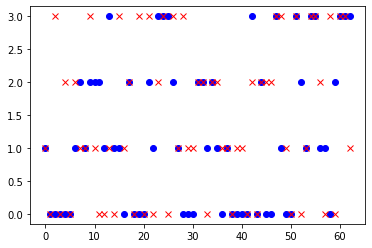

Acurácia 41.269841269841265 %


In [20]:
plt.figure()
plt.plot(classTarget, 'ob')
plt.plot(voteClassOut, 'xr')
plt.show()
print('Acurácia', np.sum(classTarget.squeeze()==voteClassOut.squeeze())/len(classTarget)*100, '%')

# df_nets_vali

In [21]:
all_predicted = np.empty([df_nets_vali.shape[0], 63])
for net_number in range(df_nets_vali.shape[0]):
    netX = df_nets_vali.iloc[net_number]
    net_predicted_str = netX['predicted'][1:-1].replace("\n", "")
    net_predicted = np.fromstring(net_predicted_str, dtype=int, sep=' ')
    all_predicted[net_number] = net_predicted

all_predicted.shape

(5166, 63)

In [22]:
voteClassOut, count = mode(all_predicted, axis=0)
print(voteClassOut)
voteClassOut = voteClassOut.reshape(63,1)

[[1. 1. 3. 0. 1. 1. 2. 1. 1. 3. 1. 0. 1. 1. 0. 3. 1. 2. 1. 3. 3. 3. 0. 2.
  3. 1. 3. 1. 3. 1. 1. 2. 2. 0. 3. 2. 1. 1. 2. 1. 3. 1. 2. 1. 2. 3. 2. 3.
  3. 1. 3. 3. 1. 1. 3. 3. 1. 0. 3. 1. 3. 3. 1.]]


In [23]:
count

array([[1815, 2126, 3119, 3519, 1792, 1703, 2184, 2473, 3032, 3197, 2469,
        2212, 1720, 2300, 1799, 3511, 2614, 1873, 2283, 3789, 1472, 2448,
        1586, 2453, 2133, 1795, 3629, 3004, 2234, 2384, 3399, 2144, 1854,
        4039, 2061, 2117, 2318, 2238, 1925, 2454, 2249, 1855, 2672, 2366,
        2401, 2066, 2055, 1930, 3257, 2118, 1714, 1919, 1823, 3056, 3195,
        2076, 1838, 2222, 2436, 2123, 3011, 2197, 2370]])

In [24]:
classTarget = np.load('y_test_class.npy')
print(classTarget.reshape(1, 63))

[[1 0 0 0 0 0 1 2 1 2 2 2 1 3 1 1 0 2 0 0 0 2 1 3 3 3 2 1 0 0 0 2 2 1 2 1
  0 1 0 0 0 0 3 0 2 0 0 3 1 0 0 3 2 1 3 3 1 1 0 2 3 3 3]]


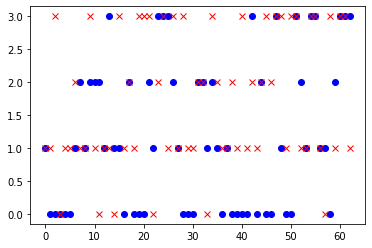

Acurácia 30.158730158730158 %


In [25]:
plt.figure()
plt.plot(classTarget, 'ob')
plt.plot(voteClassOut, 'xr')
plt.show()
print('Acurácia', np.sum(classTarget.squeeze()==voteClassOut.squeeze())/len(classTarget)*100, '%')

# Save selected nets

In [26]:
# df_nets_vali.to_excel ('selected_nets_vali.xlsx', index = False, header=True)
# df_nets_25.to_excel ('selected_nets_test_cmatrix.xlsx', index = False, header=True)